In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sklearn

import warnings
warnings.simplefilter('ignore')

In [ ]:
# import dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
df=pd.DataFrame(diabetes.data)
df.columns= diabetes.feature_names
# Creating a new column containing response variable 'y' (a quantitative measure of disease progressionone year after baseline)
df['diabetes_measure']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_measure
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
# Creating the feature matrix X
X=df.iloc[:,:-1]
# Creating the response vector y
y=df.iloc[:,-1]

In [ ]:
# Choosing 'bmi' as the only feature from the feature matrix X and reshaping the array to 2 dimensions
bmi = X.iloc[:,2]
print("Original bmi:")
print(bmi)
print(type(bmi))
bmi=bmi[:,np.newaxis]
print("Original bmi after transformation:")
print(bmi[:5])
type(bmi)

Original bmi:
0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64
<class 'pandas.core.series.Series'>
Original bmi after transformation:
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


numpy.ndarray

In [ ]:

# Choosing 'diabetes_measure' as the response variable and reshaping the array to 2 dimensions
y= df.iloc[:,-1]
y=y[:,np.newaxis]

In [ ]:
from sklearn.linear_model import LinearRegression
simple_lr = LinearRegression().fit(bmi,y)
predicted_y = simple_lr.predict(bmi)

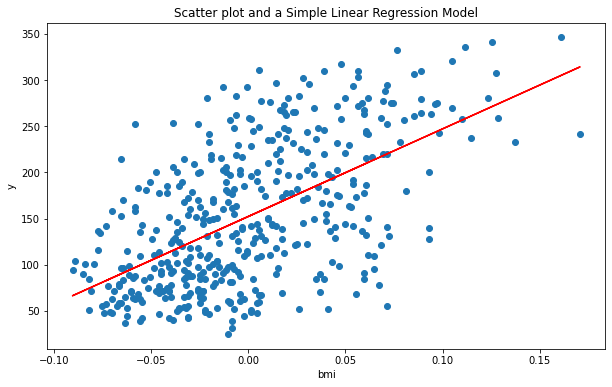

In [ ]:
# ploting results
plt.figure(figsize=(10,6))
plt.scatter(bmi, y)
plt.plot(bmi, predicted_y, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel("y")
plt.xlabel("bmi")
plt.show()

In [ ]:
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
mse= cross_val_score(simple_lr,bmi,y,scoring='neg_mean_squared_error',cv=10)
mse.mean()


-3906.91899010684

In [ ]:
# instantiating
multiple_lr = LinearRegression()
# Fitting the multiple_lr object to the data , this time using the whole feature matrix X
multiple_lr = LinearRegression().fit(X,y)
# Importing cross_val_score function from the model_selection submodule of scikit learn
from sklearn.model_selection import cross_val_score
# storing the ten scores in an object called mse
mse= cross_val_score(multiple_lr,X,y,scoring='neg_mean_squared_error',cv=10)
# taking the mean of mse for using as an indicator of how good the model is
mse.mean()

-3000.3810328390514

In [ ]:
# Saving an array containing all the ten coefficients
multiple_lr_coeffs = multiple_lr.coef_[0]
multiple_lr_coeffs

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [ ]:
feature_names = df.drop('diabetes_measure',axis=1).columns
feature_names


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

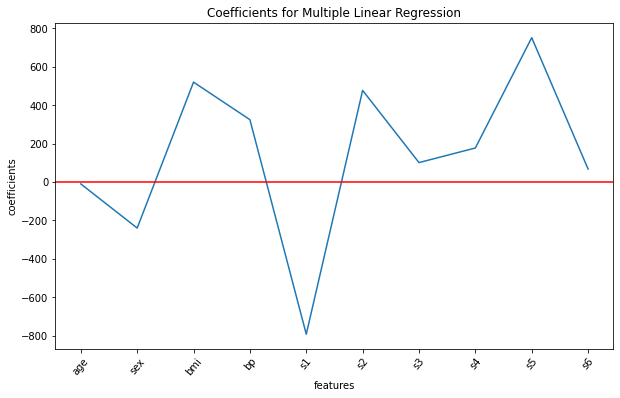

In [ ]:
# Using matplotlib commands to plot
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)),multiple_lr_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
X.corr().style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [ ]:
# importing the Ridge class from linear_model submodule of scikit learn
from sklearn.linear_model import Ridge
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Ridge estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
ridge= GridSearchCV(Ridge(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',ridge.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Ridge estimator is:',ridge.fit(X,y).best_score_)


The best value of alpha is: {'alpha': 0.04}
The best score for the best Ridge estimator is: -2997.186793719345


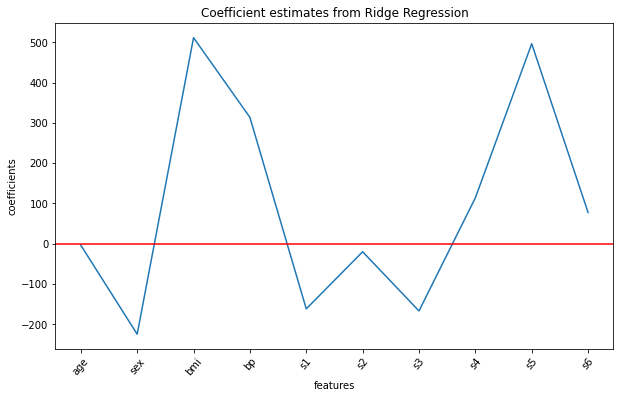

In [ ]:
# Creating an object containing the best ridge regression model
best_ridge_model= Ridge(alpha=0.04)
# Extracting the coefficient estimates for all ten features
best_ridge_coeffs = best_ridge_model.fit(X,y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_ridge_coeffs[0])
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
# importing the Lasso class from linear_model submodule of scikit learn
from sklearn.linear_model import Lasso
# importing the GridSearchCV class from model_selection submodule of scikit learn
from sklearn.model_selection import GridSearchCV
# creating a dictionary containing potential values of alpha
alpha_values = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
# Passing in a Lasso estimator, potential alpha values, scoring method and cross validation parameters to the GridSearchCV
lasso= GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
# Fitting the model to the data and extracting best value of alpha
print('The best value of alpha is:',lasso.fit(X,y).best_params_)
# Printing the average neg_mean_squared_error of a 10-fold cross validation
print('The best score for the best Lasso estimator is:',lasso.fit(X,y).best_score_)


The best value of alpha is: {'alpha': 0.06}
The best score for the best Lasso estimator is: -2987.4180821246437


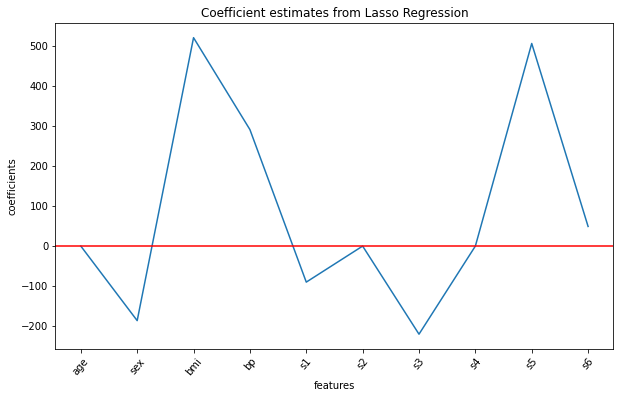

In [ ]:
# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha=0.06)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X,y).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize=(10,6))
plt.plot(range(len(feature_names)),best_lasso_coeffs)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
best_lasso_coeffs

array([  -0.        , -186.30924508,  520.89411638,  291.19604139,
        -90.06855506,   -0.        , -220.20726443,    0.        ,
        506.42221212,   49.07461404])

In [ ]:
# from sklearn.model_selection import GridSearchCV # If not already imported
from sklearn.linear_model import ElasticNet
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic= GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )


In [ ]:
elastic.fit(X,y).best_params_

{'alpha': 0.06, 'l1_ratio': 1}

In [ ]:
elastic.fit(X,y).best_score_

-2987.4180821246437

In [ ]:
# Creating a dataframe containing coefficient estimates from three models
comparing_models = pd.DataFrame({'without_regularization':multiple_lr_coeffs,
 'Ridge':best_ridge_coeffs[0],
 'Lasso':best_lasso_coeffs},
 index=feature_names)

# Highlighting coefficient estimates with value '0'
def color_red_for_zero(value):
 color = 'red' if value == 0 else 'black'
 return 'color: %s' % color
comparing_models1= comparing_models.style.applymap(color_red_for_zero)
comparing_models1

,without_regularization,Ridge,Lasso
age,-10.012198,-3.609650,-0.000000
sex,-239.819089,-224.329482,-186.309245
bmi,519.839787,511.203719,520.894116
bp,324.390428,313.552715,291.196041
s1,-792.184162,-161.533876,-90.068555
s2,476.745838,-19.892974,-0.000000
s3,101.044570,-166.679798,-220.207264
s4,177.064176,113.950246,0.000000
s5,751.279321,496.222270,506.422212
s6,67.625386,77.443906,49.074614


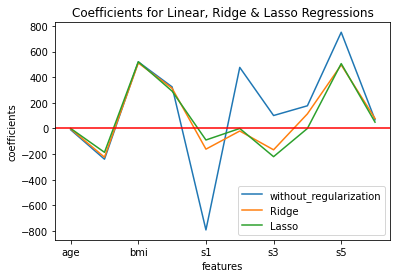

In [ ]:
comparing_models.plot()
plt.axhline(0, color='r', linestyle='solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()